In [1]:
import matplotlib.pyplot as plt
import numpy as np
from b39camera import *
from b39gain import *
%matplotlib widget

In [2]:
data = np.load('b39data.npz')

In [3]:
amps = [key for key in data.keys()]

In [4]:
# plt.figure()
# for amp in amps:
#     plt.hist(data[amp].sum(axis=2).mean(axis=1),label=amp, histtype='step')
# plt.legend()
        

6.104416631743859
9.158184354967478
11.60139906311065
6.15880771137189


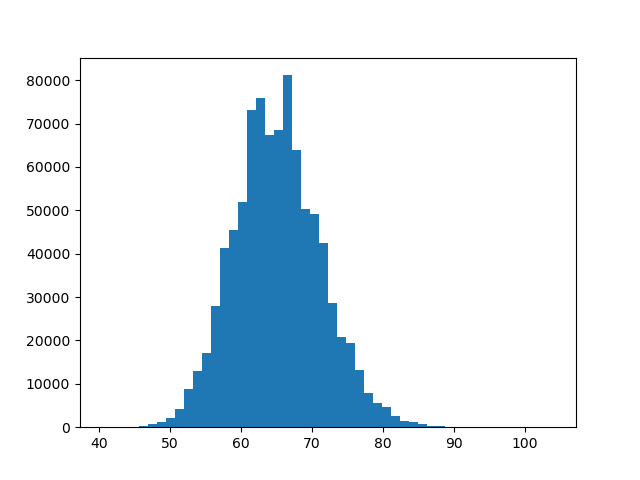

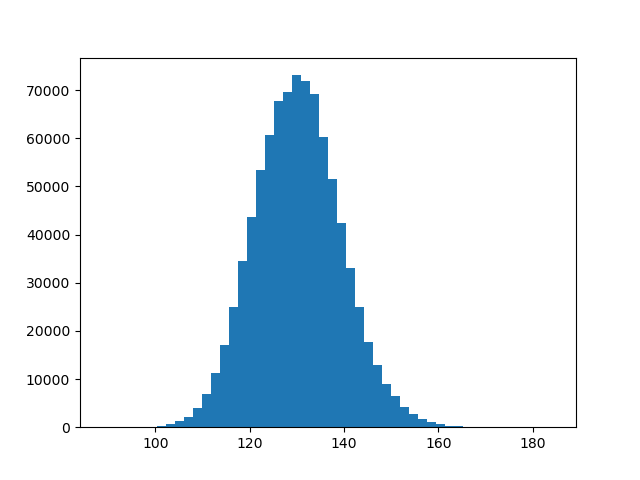

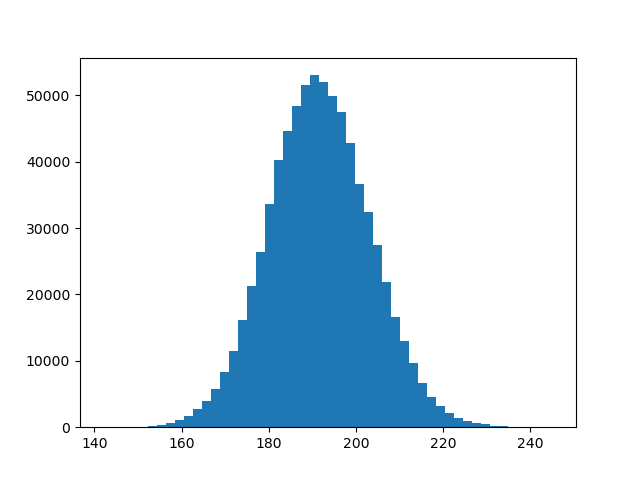

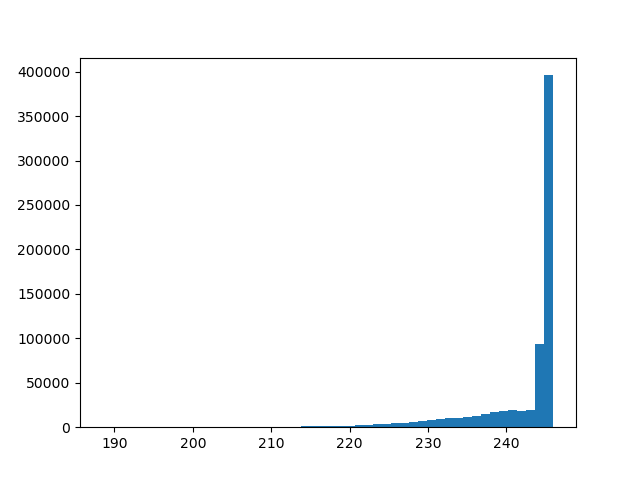

In [5]:
for amp in amps:
    plt.figure()
    peaks = data[amp].max(axis=2)
    print(np.std(peaks.flatten()))
    plt.hist(peaks.flatten(), bins=50)

In [6]:
tube_area = .001197
dist = 1.237
tube_omega = tube_area/dist**2
qe = .27
col_eff = .9
uv_filter = .89

In [7]:
for amp in amps:
    npe_array = data[amp]
    photons_at_tubes = npe_array / (qe * col_eff)
    total_photons = photons_at_tubes / uv_filter
    photons_per_omega_per_ns = total_photons * tube_omega * 100.
    meanwfs = photons_per_omega_per_ns.mean(axis=0)
    print(meanwfs.mean(axis=0).max())

22.18761453573373
45.11187061921147
66.93582712912729
86.03803638590824


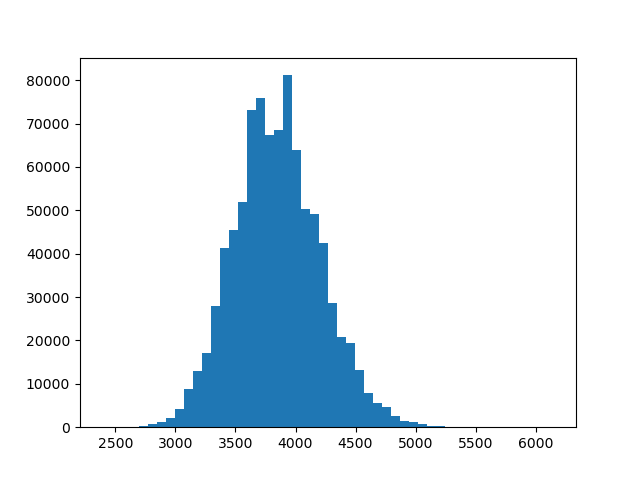

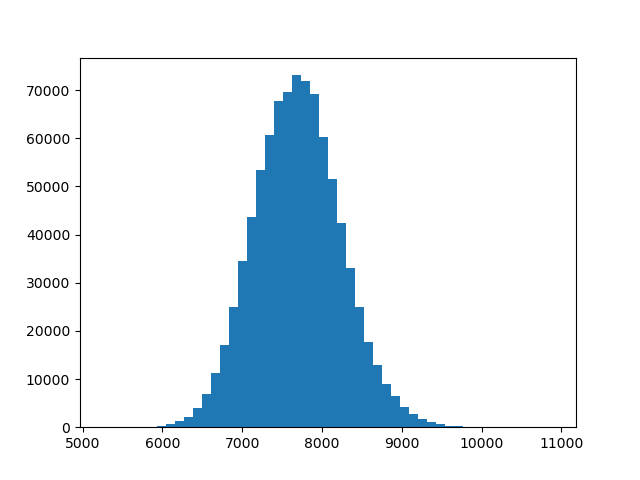

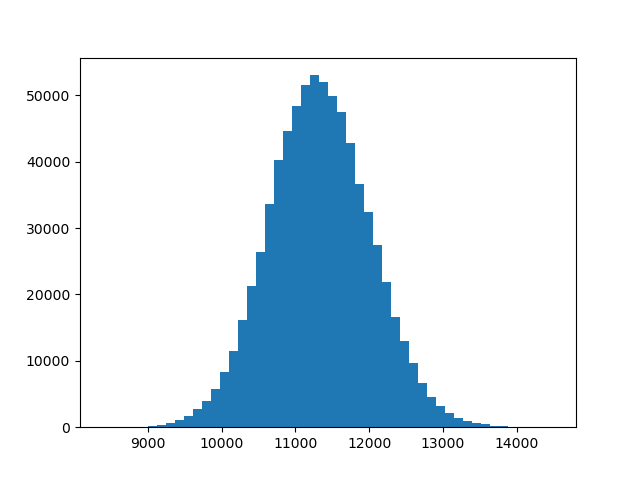

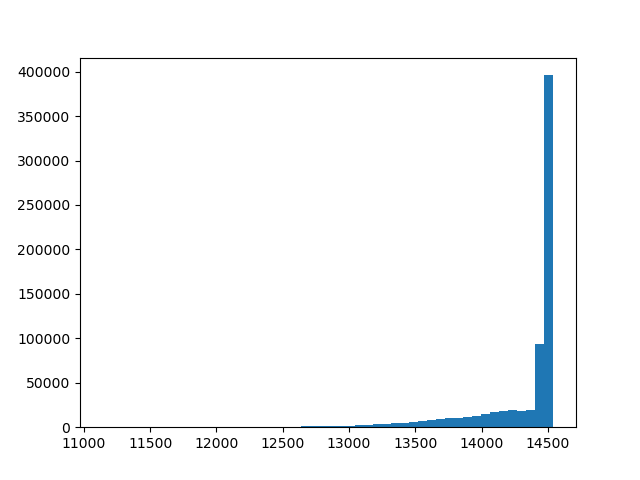

In [8]:
photons = []
errs = []
for amp in amps:
    plt.figure()
    npe_array = data[amp]
    photons_per_omega_per_ns = photons_per_ster_ns(npe_array)
    plt.hist(photons_per_omega_per_ns.max(axis=2).flatten(), bins=50)
    meanwfs = photons_per_omega_per_ns.mean(axis=0)
    meanphotons = meanwfs.mean(axis=0).max()
    photons.append(meanphotons)
    # err = photons_err(npe_array.max(axis=2).mean())
    err = np.std(photons_per_omega_per_ns.max(axis=2))
    # err = photons_err(npe_array)
    errs.append(err)
    # print(meanwfs.mean(axis=0).max())
ampfit = np.array(amps).astype('int')

In [9]:
from b39camera import row

In [10]:
row([255])

array([15])

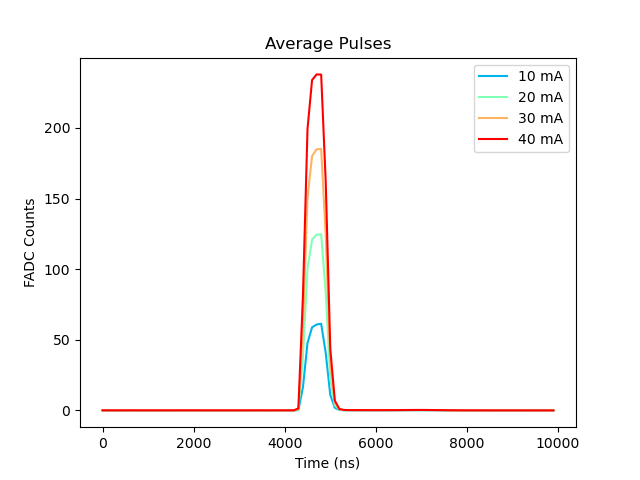

In [11]:
plt.figure()
colors = plt.cm.rainbow(np.array([10,20,30,40])/40)
for i,amp in enumerate(amps):
    avg_npe = data[amp].mean(axis=0).mean(axis=0)
    plt.plot(np.arange(0,100*100,100),avg_npe,color=colors[i], label = f'{amp} mA')
plt.title('Average Pulses')
plt.ylabel('FADC Counts')
plt.xlabel('Time (ns)')
plt.legend()

In [12]:
from scipy.optimize import curve_fit
def e_output(amp: float | np.ndarray, a: float, b: float) -> float | np.ndarray:
    return a * (1 - np.exp(-amp/b))

popt1, pcov1 = curve_fit(e_output, ampfit, photons, p0=(400,200), sigma = errs)

(0.0, 15000.0)

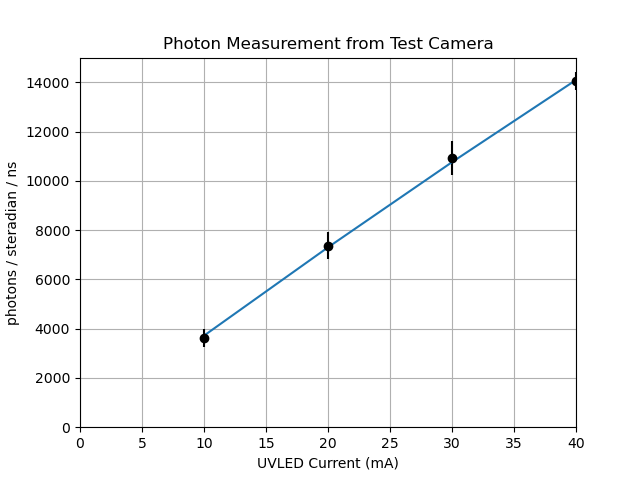

In [13]:
plt.figure()
plt.errorbar(np.array(amps).astype('int'), photons,yerr=errs, color='k',linestyle='',marker='o')
plt.plot(ampfit, e_output(ampfit,*popt1))
plt.xlabel('UVLED Current (mA)')
plt.ylabel('photons / steradian / ns')
plt.title('Photon Measurement from Test Camera')
plt.grid()
plt.xlim(0,40)
plt.ylim(0,15000)

In [14]:
errs[-1]

364.0370727261355